<center><h1><u>Project:1- Retail Sales Prediction</center></h1></u>

Hello everyone!! A hearty welcome to the 1st project of Time Series module.

![](https://media3.giphy.com/media/XaA0fpudSHPf4MPlEK/200w.gif?cid=82a1493bmap44u5bml846wugjgrv4kkqsolg8vk50pg1cgh1&rid=200w.gif&ct=g)

The aim of this project is to forecast furniture sales using time series techniques.



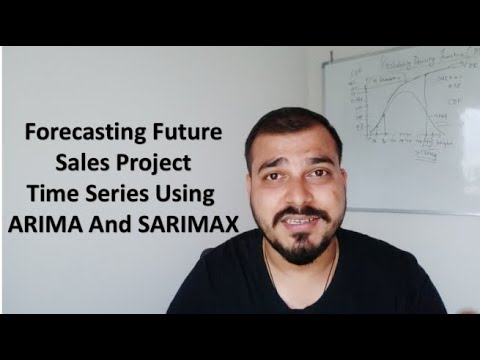

In [ ]:
###Refer Video
from IPython.display import YouTubeVideo
YouTubeVideo('2XGSIlgUBDI', width=700, height=400)

The dataset used in the project is present in the google drive. So the drive has to be first mounted to use the dataset. For that use the drive library from google.colab and then mount the drive using mount function.

In [ ]:
# import drive from google.colab

# mount the drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Move ahead by importing necessary libraries given below:

* **itertools:** Functions creating iterators for efficient looping, https://docs.python.org/3/library/itertools.html
* **numpy:** for array and matrix operations
* **pandas:** for storing and manipulating data
* **statsmodels.api:** statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, https://www.statsmodels.org/stable/index.html
* **matplotlib:** for plotting and visualizations

After importing all the libraries, set of the matplotlib parameters using rcParams. rcParams is an instance of RcParams for handling default Matplotlib values. Refer: https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams



In [ ]:
#import above mentioned libraries



#plt.style.use('fivethirtyeight')

#set axes.labelsize to 14

#set xtick.labelsize to 12

#set ytick.labelsize to 12

#set text.color to 'k'


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Ahead read the dataset. Download it from the given link and upload it in your drive. Link: https://drive.google.com/file/d/109apiSFgFA1gG6BXmS1QBLqYdWDDmMkE/view?usp=sharing. The data displays sales of furniture in various regions of USA. The columns present are [Row ID, Order ID,	Order Date,	Ship Date,	Ship Mode,	Customer ID,	Customer Name,	Segment,Country,	City,	State,	Postal Code,	Region,	Product ID,	Category,	Sub-Category,	Product Name,	Sales,	Quantity,	Discount,	Profit]. Get the url of the dataset and read it using pandas.read_csv method. parse dates based on 'Order Date' column. Set encoding to 'unicode_escape'.Refer:https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

In [ ]:
#get the dataset path

#read the data

#print first 5 rows


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


The dataset consists of both categorical as well as continuous variables. Lets describe it using describe method.

In [ ]:
#describe the dataset


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


We need only the dates and sales on that particular date for forecasting the sales. Hence we drop all the other columns.

In [ ]:
#take all the columns names in a list

#drop the above columns keeping axis 1

#print first 5 rows


,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


Let's now arrange the data sorting it based on Order Date using sort_values function. Check whether there are any missing values using isnull and sum functions.



In [ ]:
# Sort the Order Date 

#print the first row of sorted values

#check any missing values


     Order Date   Sales
7980 2014-01-03  16.448


Order Date    0
Sales         0
dtype: int64

There are no missing values, hence we can proceed further. 
<br><br> In the next step we group the sales based on order date i.e. we sum up the sales recorded on the same day. Do this by using the groupby, sum and reset_index function.

In [ ]:
# grouping sales according to Order Date
#furniture.groupby('Order Date')['Sales'].sum().reset_index()


# min and max values of Order Date



2014-01-03 00:00:00
2017-12-30 00:00:00


Next set the 'Order Date' column as index column using set_index method.

In [ ]:
#set 'Order Date' as index

#furniture.index



DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-04', '2014-01-04',
               '2014-01-05', '2014-01-06', '2014-01-06', '2014-01-06',
               '2014-01-06', '2014-01-06',
               ...
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-30',
               '2017-12-30', '2017-12-30', '2017-12-30', '2017-12-30',
               '2017-12-30', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=9994, freq=None)

Next average the daily sales value for each month, use start of each month as the timestamp. Use the resample method and mean method to do so. resample() is a Convenience method for frequency conversion and resampling of time series. https://www.geeksforgeeks.org/python-pandas-dataframe-resample/. Pass the value 'MS' to resample method to get month start frequency. Apply mean function ahead.



In [ ]:
# average the daily sales value for each month 
# use start of each month as the timestamp
#y = furniture['Sales'].resample('MS').mean()

#y['2017':]


Order Date
2017-01-01    283.686284
2017-02-01    189.730219
2017-03-01    247.362827
2017-04-01    179.909045
2017-05-01    182.897150
2017-06-01    216.251942
2017-07-01    200.285027
2017-08-01    289.545358
2017-09-01    191.430614
2017-10-01    260.996387
2017-11-01    258.056264
2017-12-01    181.448742
Freq: MS, Name: Sales, dtype: float64

Plot the resampled data using plot function of matplotlib.

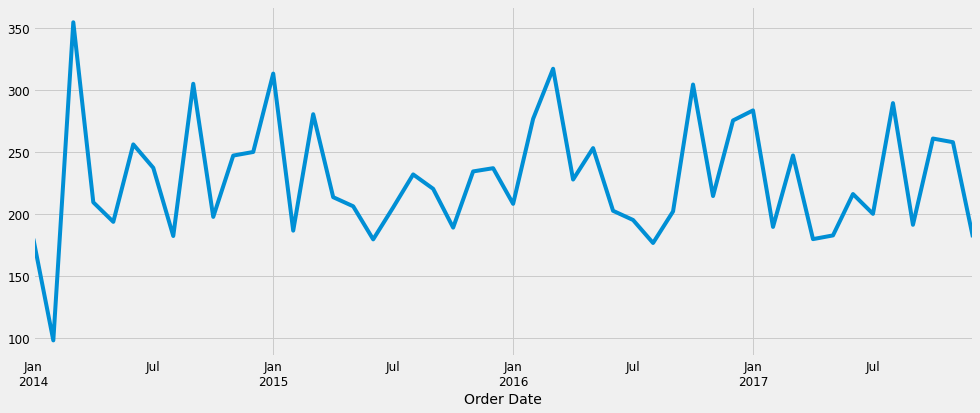

In [ ]:
#plot graph [y.plot(figsize = (15, 6))]



Now lets decompoe our data into its various components like trend, seasonality and residual. Use the sm.tsa.seasonal_decompose to do so. Refer: https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html. Give 'additive' value to model parameter. Plot the decomposition

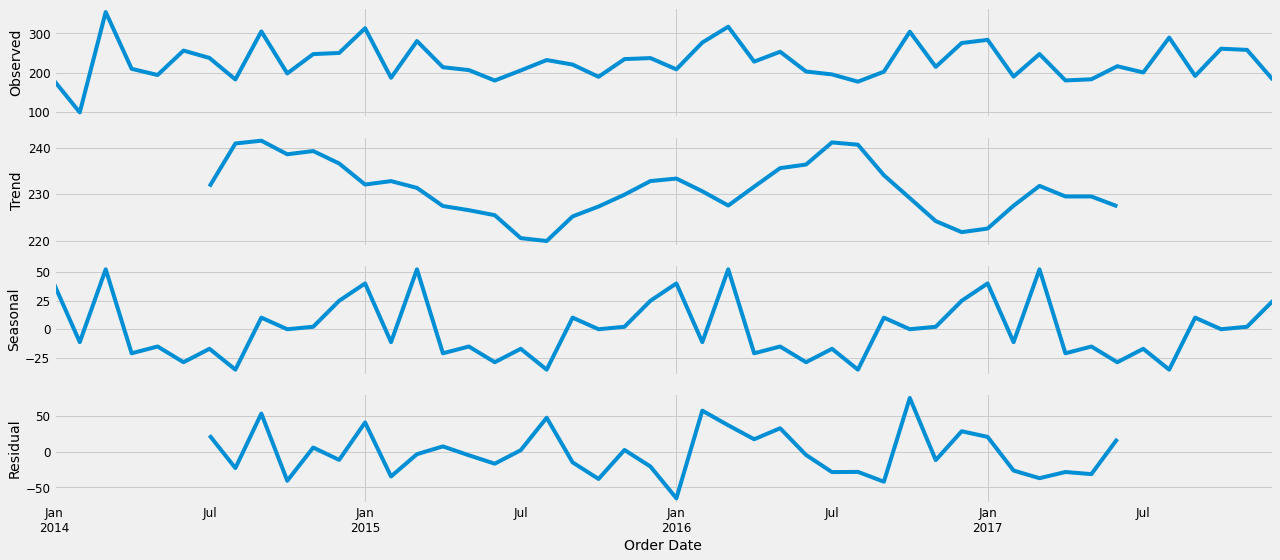

In [ ]:
#from pylab import rcParams
#rcParams['figure.figsize'] = 18, 8


#decompose the data

#plot the decomposed data

#show the plot


Next we create a list for p,d,q values.
* p: order of Autoregressive model (AR model)
* d: no. of differencing required for stationary data
* q: order of Moving Average model (MA model)

Consider these values in the range 0 to 2(exclusive) using range function. Use itertools to get product of p,d,q which means creates combinations of p,d,q. Refer: https://docs.python.org/3/library/itertools.html. Create a list having all these values along with seasonality as 12.

In [ ]:
# set the typical ranges for p, d, q


#take all possible combination for p, d and q
#pdq = list(itertools.product(p, d, q))

#create new list using list comprehension
#seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


#print some of the combination examples




Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


After getting combinations of parameters, we need to find the best set of parameters. To achieve this, we use grid search method. Grid search builds a model for every combination of hyperparameters specified and evaluates each model. This helps in selecting the best parameters.

Apply the sm.tsa.statespace.SARIMAX to the data by specifying all combinations of parameters one by one. We have already covered an assignment on SARIMAX(Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model). Refer: https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html. 

In [ ]:
# Using Grid Search find the optimal set of parameters that yields the best performance
#iterate through pdq

    #iterate through seasonal_pdq

        #try

            #aaply SARIMAX, sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 

            #fit the model

            #print the results, print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))

        #except

            #continue


ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:661.5238453481245


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2125.305114373525
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:402.07466784791643
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:568.0812131285583
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:563.3702947829406
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:395.73870136528967
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:624.7073376670601


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2167.4459282149055
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:404.05723836320794
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:565.8511871070131
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:563.4641113561963
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:397.2652484384613
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:539.8605974537222


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2119.3463093486484
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:413.4421987151058
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:540.1473655055303


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2069.229897831125
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:411.1502241606384
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:505.24941907182244


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1557.1084530574678
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:397.56646108396234
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:507.00994558513065


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1828.512441301616
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:392.0933287553431
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:553.9945048920486


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2360.7035238664275
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:404.0620300755992
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:552.9272857949777
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:553.5803860727463
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:397.27571034278833


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:520.9341422187579


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1987.2806981064214
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:405.50341283446124


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:522.7220116512603


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:524.6821726956782
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:396.0818242406414
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:519.881890546721


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1827.2938922665724
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:408.05937080526047
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:521.8609414869665
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:399.8530806573024
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:505.5628866933253


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2161.335102566915
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:399.56190080713895
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:507.52247737023316
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:393.84819876436995


Check for parameters that give the lowest AIC Score. Use these parameters to train the final model.

In [ ]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)
#train model


#fit the model

#print first summary table


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0913      0.286     -0.319      0.750      -0.651       0.469
ma.L1         -0.9982      9.598     -0.104      0.917     -19.810      17.813
ar.S.L12      -0.5598      0.156     -3.594      0.000      -0.865      -0.254
sigma2      2799.1393   2.67e+04      0.105      0.917   -4.95e+04    5.51e+04


Next get the predictions from date '2017-01-01'. Use the get_prediction function. Pass the value pd.to_datetime('2017-01-01') to the start parameter, keep dynamic as False.
Refer: https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.get_prediction.html

In [ ]:
#get the predictions

#get confidence range using conf_int()

#print the confidence range


,lower Sales,upper Sales
Order Date,,
2017-01-01,166.949829,380.855435
2017-02-01,128.374777,341.873715
2017-03-01,201.126554,414.265415
2017-04-01,122.357190,335.174994
2017-05-01,126.153430,338.683179
2017-06-01,87.013281,299.283140
2017-07-01,92.953016,304.987211
2017-08-01,102.323359,314.142881
2017-09-01,103.098060,314.721217


Its time to visualize our predicted data.

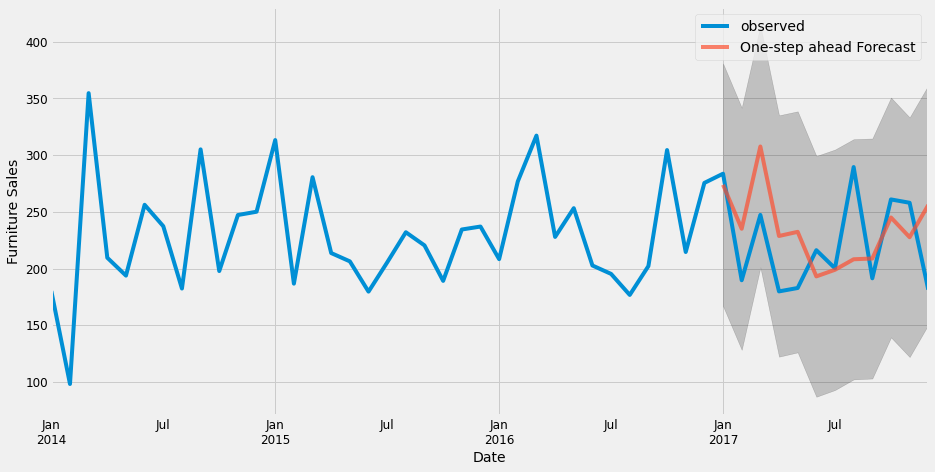

In [ ]:
#Visualize the forecasting
#plot observed data after 2014

#plot predicted data,prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))

#fill area between confidence range, ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)

#set x label

#set y label

#set legend and show



Next cjeck the evaluation scores like Squared mean error and root mean squared error.

In [ ]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
#get prediction mean using prediction_mean

#y_truth = y['2017-01-01':]


#calculate mse,((y_hat - y_truth) ** 2).mean()

#take square root of mse to get rmse

#print both mse and rmse



The Mean Squared Error of our forecasts is 2069.58
The Root Mean Squared Error of our forecasts is 45.49


Now forecast the out sample data and plot it. use get_forecast on result to get the forecasted values. Refer:https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAXResults.get_forecast.html. 

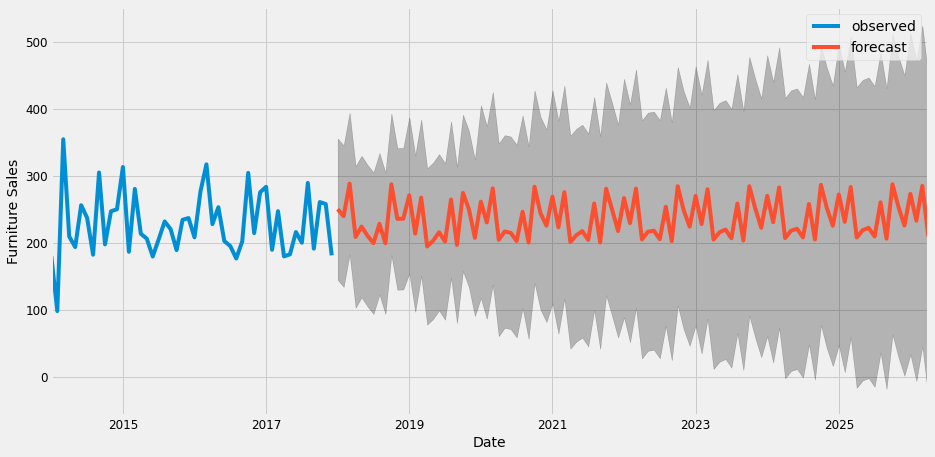

In [ ]:
# forcasting for out of sample data
#get forecasted data for 100 steps

#get confidence range

#plot observed data

#plot predicted data

#fill area between confidence range

#set x label

#set y label

#set legend and show



Our model clearly captured furniture sales seasonality.
As we forecast further out into the future, it is natural for us to become less confident in our values.
This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.

Congratulations!!! You've done it. 

In this assignment you implemented Retail sales prediction project using time series analysis.

Keep practising!!<br><br> 

## Do fill the feedback form given below:
## [Feedback form](https://forms.zohopublic.in/cloudyml/form/CloudyMLDeepLearningFeedbackForm/formperma/VCFbldnXAnbcgAIl0lWv2blgHdSldheO4RfktMdgK7)

![](https://c.tenor.com/iBLzg9X4HbQAAAAC/clapping-leonardo-dicaprio.gif)